In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




Final Parameters (theta): [0.9966201 0.0013402]
Final Cost Function Value: 1.1947898109836605e-06


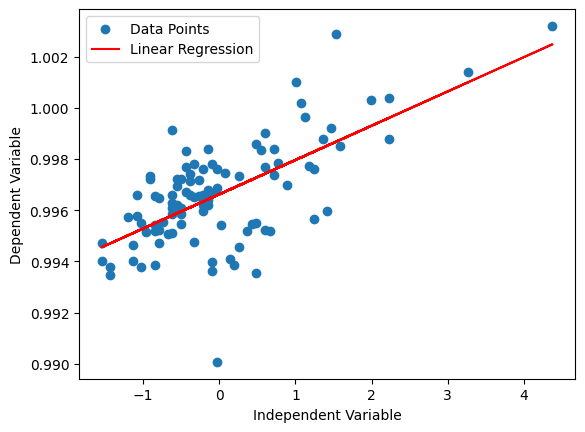

In [5]:


df_X = pd.read_csv('linearX.csv', header=None)
df_y = pd.read_csv('linearY.csv', header=None)

X = df_X.values
y = df_y.values

X = (X - np.mean(X)) / np.std(X)

X = np.c_[np.ones(X.shape[0]), X]


alpha = 0.5
iterations = 1000


theta = np.zeros((X.shape[1], 1), dtype=float)

for _ in range(iterations):

    predictions = np.dot(X, theta)


    error = predictions - y


    theta = theta - (alpha / len(y)) * np.dot(X.T, error.reshape(-1, 1))


print("Final Parameters (theta):", theta.flatten())

cost = (1 / (2 * len(y))) * np.sum((predictions - y)**2)
print("Final Cost Function Value:", cost)

plt.scatter(X[:, 1], y, label='Data Points')
plt.plot(X[:, 1], predictions.flatten(), color='red', label='Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()



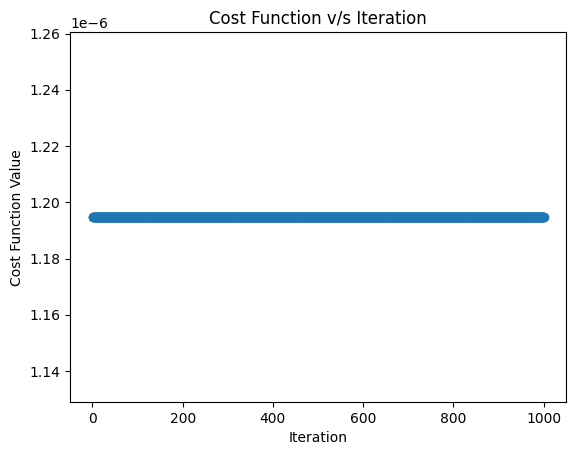

In [6]:
cost_history = []

for i in range(iterations):
    predictions = np.dot(X, theta)

    error = predictions - y

    theta = theta - (alpha / len(y)) * np.dot(X.T, error.reshape(-1, 1))

    cost = (1 / (2 * len(y))) * np.sum((predictions - y)**2)
    cost_history.append(cost)

plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function v/s Iteration')
plt.show()

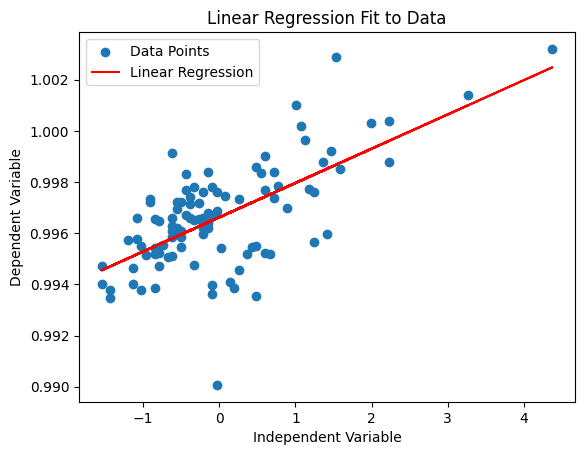

In [7]:
for _ in range(iterations):
    predictions = np.dot(X, theta)
    error = predictions - y

    theta = theta - (alpha / len(y)) * np.dot(X.T, error.reshape(-1, 1))


plt.scatter(X[:, 1], y, label='Data Points')
plt.plot(X[:, 1], predictions.flatten(), color='red', label='Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.title('Linear Regression Fit to Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-8-ef3c585b4c91>:23: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * len(y))) * np.sum((predictions - y)**2)
<ipython-input-8-ef3c585b4c91>:20: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha / len(y)) * np.dot(X.T, error.reshape(-1, 1))


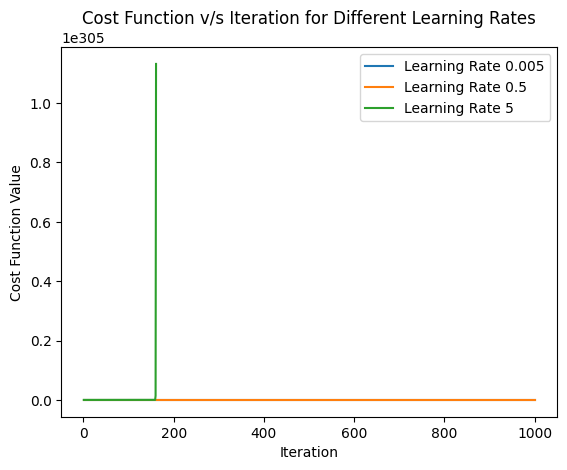

In [8]:

def linear_regression(X, y, alpha, iterations):
    X = np.c_[np.ones(X.shape[0]), X]

    theta = np.zeros((X.shape[1], 1), dtype=float)

    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)

        error = predictions - y

        theta = theta - (alpha / len(y)) * np.dot(X.T, error.reshape(-1, 1))

        cost = (1 / (2 * len(y))) * np.sum((predictions - y)**2)
        cost_history.append(cost)

    return theta, cost_history


learning_rates = [0.005, 0.5, 5]
iterations = 1000

for lr in learning_rates:
    _, cost_history = linear_regression(X, y, lr, iterations)

    plt.plot(range(1, iterations + 1), cost_history, label=f'Learning Rate {lr}')

plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function v/s Iteration for Different Learning Rates')
plt.legend()
plt.show()


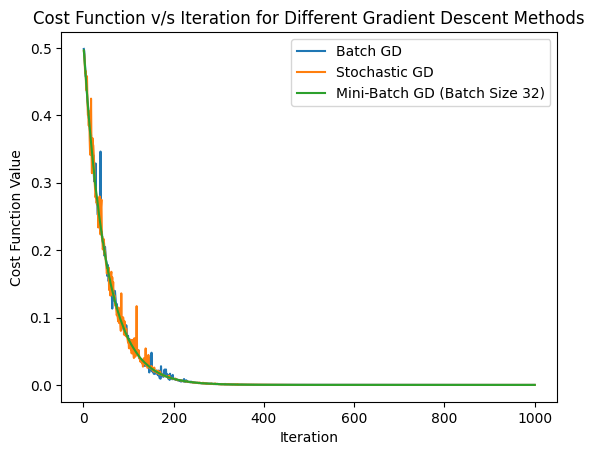

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_regression(X, y, alpha, iterations, batch_size=None):
    X = np.c_[np.ones(X.shape[0]), X]

    theta = np.zeros((X.shape[1], 1), dtype=float)

    cost_history = []

    for _ in range(iterations):
        if batch_size is None:
            random_index = np.random.randint(0, len(y))
            X_batch = X[random_index].reshape(1, -1)
            y_batch = y[random_index].reshape(1, -1)
        else:
            indices = np.random.choice(len(y), batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]

        predictions = np.dot(X_batch, theta)

        error = predictions - y_batch

        theta = theta - (alpha / len(y_batch)) * np.dot(X_batch.T, error)

        cost = (1 / (2 * len(y_batch))) * np.sum((predictions - y_batch)**2)
        cost_history.append(cost)

    return theta, cost_history

df_X = pd.read_csv('linearX.csv', header=None)
df_y = pd.read_csv('linearY.csv', header=None)

X = df_X.values
y = df_y.values

X = (X - np.mean(X)) / np.std(X)

learning_rate = 0.01

iterations = 1000

batch_size = 32

theta_batch, cost_history_batch = linear_regression(X, y, learning_rate, iterations)

theta_stochastic, cost_history_stochastic = linear_regression(X, y, learning_rate, iterations, batch_size=1)

theta_mini_batch, cost_history_mini_batch = linear_regression(X, y, learning_rate, iterations, batch_size=batch_size)

plt.plot(range(1, iterations + 1), cost_history_batch, label='Batch GD')
plt.plot(range(1, iterations + 1), cost_history_stochastic, label='Stochastic GD')
plt.plot(range(1, iterations + 1), cost_history_mini_batch, label=f'Mini-Batch GD (Batch Size {batch_size})')

plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.title('Cost Function v/s Iteration for Different Gradient Descent Methods')
plt.legend()
plt.show()
